# Effects of different preprocessing techniques on cataract dataset

#### Bekir Semih Tekeli
#### Ayşe Şule Bakal

Abstract of the project comes here.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

## Data Understanding<a class="anchor" id="data_understanding"></a>

<h1><span class="label label-primary">Eye Diseases:</span></h1>
<div class="card text-white bg-info mb-3" style="max-width: 60rem;">
  <div class="card-body">

There are many eye diseases. Every anatomical part of this organ can present a disorder and cause an eye disorder. It is important for the patient to fully understand the nature of his ocular disorder in order to take good care of his visual condition. It also makes it possible to better manage a disease and detect signs indicating deterioration. An informed and savvy patient is more likely to be treated on time, to feel confident and to adhere to their treatment..
  </div>
</div>

<div class="card text-white bg-primary" style="max-width: 60rem;">
  <div class="card-body">
    <p class="card-text">
In this dataset, annotations were added by human readers trained in quality control management. They classify patients into four categories, including:

</p>
  </div>

 <ul style="list-style-type:circle;">
  <li>Normal       (N)</li>
  <li>Cataract     (C)</li>
  <li>Glaucoma     (G)</li>
  <li>Diabetes     (D)</li>
</ul>
</div>


# Retina

The retina is a delicate, multilayered light-sensitive membrane lining the inside wall at the back of the eye. It is connected by the optic nerve to the brain. The macula, at the center of the retina, creates our ability to see detail. The central pit in the macula that produces the sharpest vision is the fovea. Surrounding the macula is the peripheral retina, which enables our peripheral vision. Attached to the retina, the vitreous is a gel-like substance that fills the eyeball between the lens and the retina.


# Normal (N)

![](https://www.rcseattle.com/wp-content/uploads/2016/05/resources-normal-1.png)

# Cataract (C)
A cataract is a clouding of the natural lens of the eye, called the lens. The latter is located inside the eye, behind the iris, which represents the colored part forming the pupil. The diagram of the anatomy of the eye shows it well. Several factors, including age, heredity, medication and environment, contribute to the formation of cataracts. Over time, the lens becomes frosty, yellowish and hazy. The light passing through this lens is therefore altered and diminished by the cataract. Cataract extraction is an intraocular surgical procedure that can permanently treat this condition.

![](https://www.nvisioncenters.com/wp-content/uploads/cataract-eye-vs-normal-eye-960x639.jpg)

# Glaucoma (G)
Glaucoma is an eye disease that irreversibly and permanently affects the optic nerve (structural damage). The optic nerve is the part of the eye through which passes all the visual information captured by the eye. This information travels through the optic nerve and is transmitted to the brain.

Glaucoma is a very common disease that affects people of all ages. According to sources, it is estimated that up to 10% of the population would be affected. Globally, this represents 65 million people.

![](https://www.wolfeeyeclinic.com/filesimages/Glaucoma/GlaucomaEyeDiagram-min.jpg)

# Diabetes (D)
Diabetes is a very serious disease that can cause problems like blindness, heart disease, kidney failure and amputations. By taking good care of your health through healthy eating, regular exercise and taking your medications, you can control diabetes. Diabetes can also affect the eye, this is called diabetic retinopathy.

All people with diabetes should have an eye exam using a photo-screening device or an eye exam with pupil dilation annually. As soon as the disease (diabetic retinopathy) is visible in the eye, an examination with pupil dilation should be performed for follow-up at variable frequency.

In some people with diabetic retinopathy, the blood vessels in the retina may swell and leak, while in others, new abnormal blood vessels may form on the surface of the retina. These changes can lead to vision loss or even blindness.

![](https://myvision.org/wp-content/uploads/2022/02/diabetic-retinopathy-diagram-664x321.jpg)


## Data Preparation<a class="anchor" id="data_preparation"></a>

In [1]:
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras import backend as K
from keras.utils import get_custom_objects
import efficientnet.tfkeras as efn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
import tensorflow as tf

tf.get_logger().setLevel('INFO')
import cv2
import os, glob
import pandas as pd

2022-12-27 02:03:02.386111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 02:03:02.562612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-27 02:03:02.562628: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-27 02:03:03.468956: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
DATASET_PATH = r"./dataset/"
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
EPOCHS = 30
BATCH_SIZE = 32
SEED = 42
dataset_folders = []  # to keep main folder names
total = 0
print(f"There are {len(os.listdir(DATASET_PATH))} folder in dataset.")
for path in sorted(os.listdir(DATASET_PATH)):
    print(f"\t-There are {len(os.listdir(DATASET_PATH + path))} images in {path} folder.")
    total += len(os.listdir(DATASET_PATH + path))  # add element size of the current folder to total variable
    dataset_folders.append(DATASET_PATH + path)  # add current folder path to dataset_folders

# Create an empty dataframe
df = pd.DataFrame(0,
                  columns=['paths',
                           'class-label'],
                  index=range(total))
# store each image path in the dataframe
# class labels -> 0:Normal 1:Cataract 2:Glaucoma 3:RetinaDisease
i = 0
for p, path in enumerate(dataset_folders):  # main folders
    for sub_path in sorted(os.listdir(path)):  #images
        df.iloc[i, 0] = path + "/" + sub_path
        df.iloc[i, 1] = p
        i += 1
# Display some examples for the created DataFrame
print(df.sample(frac=1, random_state=SEED).head(10))

There are 4 folder in dataset.
	-There are 300 images in 1_normal folder.
	-There are 100 images in 2_cataract folder.
	-There are 101 images in 2_glaucoma folder.
	-There are 100 images in 3_retina_disease folder.
                                         paths  class-label
110              ./dataset/1_normal/NL_111.png            0
419      ./dataset/2_glaucoma/Glaucoma_020.png            2
565  ./dataset/3_retina_disease/Retina_065.png            3
77               ./dataset/1_normal/NL_078.png            0
181              ./dataset/1_normal/NL_182.png            0
284              ./dataset/1_normal/NL_285.png            0
10               ./dataset/1_normal/NL_011.png            0
469      ./dataset/2_glaucoma/Glaucoma_070.png            2
78               ./dataset/1_normal/NL_079.png            0
349      ./dataset/2_cataract/cataract_050.png            1


In [3]:
example_paths = ["./dataset/1_normal/NL_001.png", "./dataset/2_cataract/cataract_001.png",
                 "./dataset/2_glaucoma/Glaucoma_001.png", "./dataset/3_retina_disease/Retina_001.png"]
images_array1 = []
images_array2 = []


def display_examples(images_array1, images_array2, row1, row2):
    fig = plt.figure(figsize=(15, 9))
    plt.title(f"First row->{row1} Images    Second row->{row2} Images")
    plt.axis('off')
    plt.grid(False)
    for i in range(4):
        current_path = example_paths[i]

        fig.add_subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        plt.imshow(images_array1[i])

        fig.add_subplot(2, 4, i + 5)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        plt.imshow(images_array2[i])

## Initial preprocess
Our first preprocess is apllied also for all other preprocesses that we used.

In this preprocess, we delete unnecessary black areas from the images. Also we resize the images to 256x256 due to huge dimensions.

In [4]:
#Cropping image to avoid from unnecessary black areas
def deleteBlackAreas(filename):
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
    img = cv2.imread(filename)  #read image from file
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)  # turn it into a binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # find contours
    if len(contours) != 0:
        #find the biggest area
        cnt = max(contours, key=cv2.contourArea)

        #find the bounding rect
        x, y, w, h = cv2.boundingRect(cnt)

        crop = img[y:y + h, x:x + w]  # crop image
        crop1 = cv2.cvtColor(cv2.resize(crop, image_size, interpolation=cv2.INTER_AREA),
                             cv2.COLOR_BGR2RGB)  # resize to image_size and change color space from BGR to RGB for matplotlib
        return crop1
    else:
        return cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)

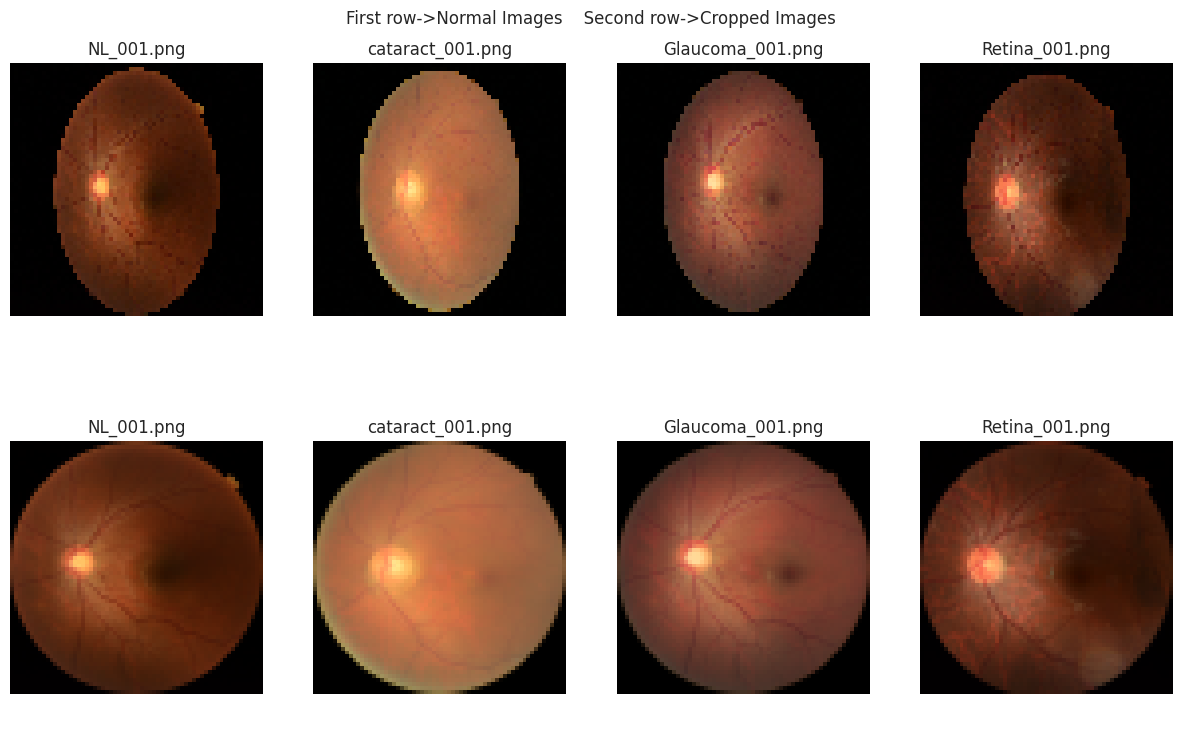

In [5]:
for i in range(4):
    img = cv2.resize(cv2.cvtColor(cv2.imread(example_paths[i]), cv2.COLOR_BGR2RGB), (IMAGE_WIDTH, IMAGE_HEIGHT))
    images_array1.append(img)
    img2 = deleteBlackAreas(example_paths[i])
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Normal", "Cropped")
images_array1.clear()
images_array2.clear()

## 1.Normalization of histogram of images
In this preprocess, we normalize all three (R-G-B) channels

In [6]:
#normalizes the histogram of images
def normalize_histograms(img):
    image_copy = img.copy()
    for i in range(3):
        imi = img[:, :, i]
        minval = np.min(imi)
        maxval = np.max(imi)
        imrange = maxval - minval
        # imi-minval will turn the color range between 0-imrange, and the scaling will stretch the range between 0-255
        image_copy[:, :, i] = (255 / (imrange + 0.0001) * (imi - minval))
    return image_copy

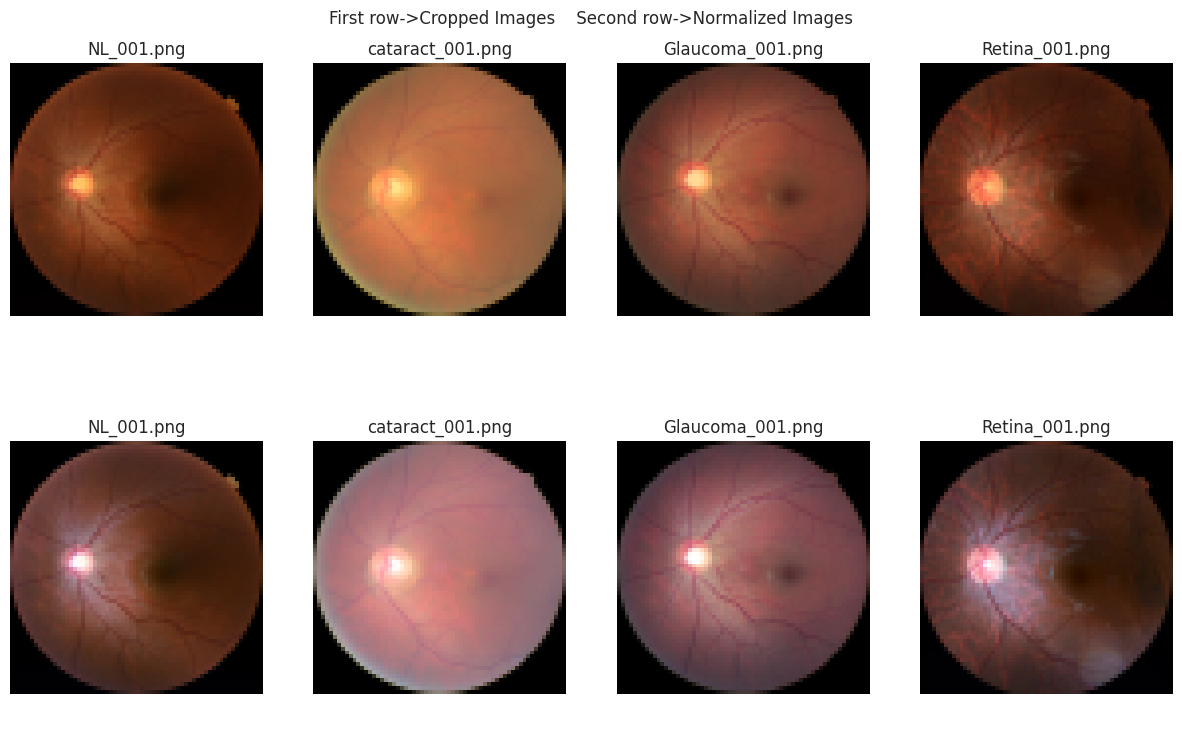

In [7]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = normalize_histograms(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Normalized")
images_array1.clear()
images_array2.clear()

# 2.Canny Edge

In [8]:
def canny_edge(img):
    t_lower=30
    t_upper=130
    edges=cv2.Canny(img,t_lower,t_upper,L2gradient=True)
    return edges

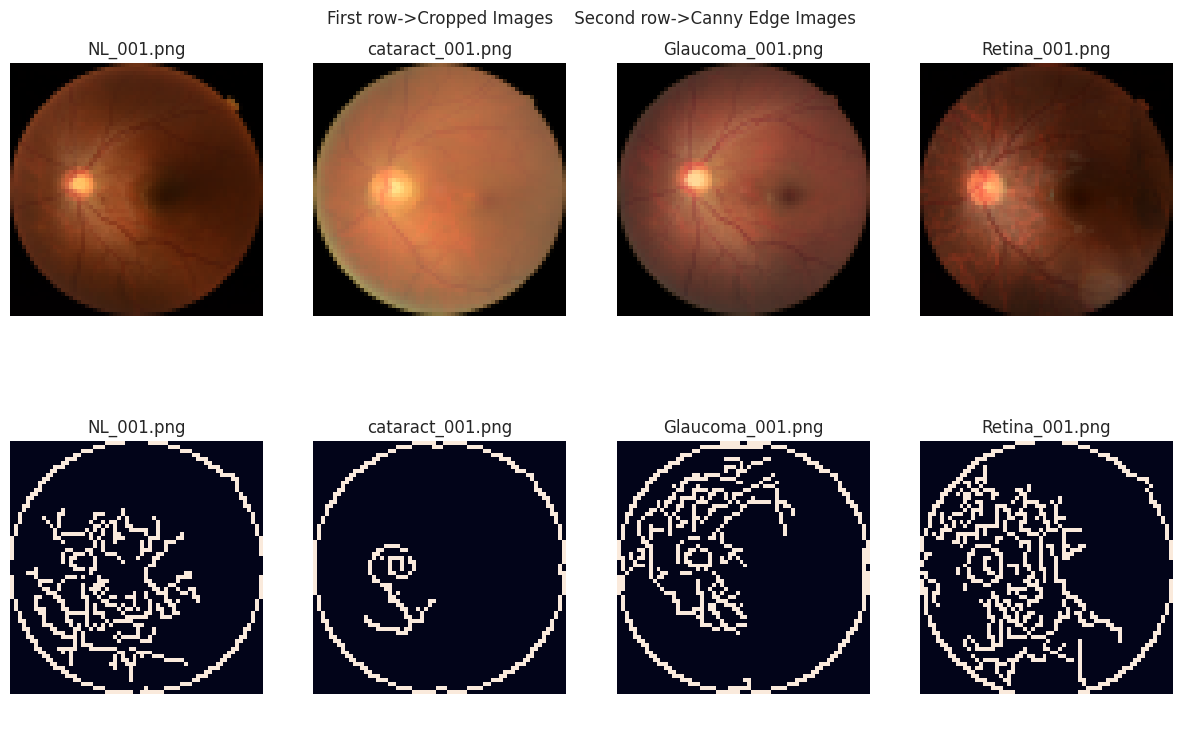

In [9]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = canny_edge(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Canny Edge")
images_array1.clear()
images_array2.clear()

In [10]:
def create_dataset(df, mode=0):
    # Creating dataset
    images = {0: [], 1: []}
    labels = {0: [], 1: []}
    limit = len(df) - len(df) * 0.3  # split the data with test_size=0.3
    index = 0
    df = df.sample(frac=1, random_state=SEED)  # shuffle the dataframe with seed=42
    for i in range(len(df)):
        if (i + 1) >= limit:  #train data limit. above of this, add to test data
            index = 1
        filename = df.iloc[i]["paths"]
        img = deleteBlackAreas(filename)  #deleting black areas. Initial preprocess
        #According to parameter, we apply some preprocesses here. default=0
        if mode == 1:
            img = normalize_histograms(img)
        elif mode == 2:
            img= canny_edge(img)
        label = df.iloc[i]["class-label"]
        #Flipping the image horizontally and vertically
        imlr = cv2.flip(img, 0)
        imud = cv2.flip(img, 1)

        #add all the images and labels
        images[index].append(img)
        labels[index].append(label)
        images[index].append(imlr)
        labels[index].append(label)
        images[index].append(imud)
        labels[index].append(label)

        # Below processes can be used to increase data size

        ## In these processes first we add little brightness to image. Then flip it horizontally and vertically
        imb = img + 0.075 * img  # brighter image
        images[index].append(imb)
        labels[index].append(label)

        imblr=cv2.flip(imb,0)
        imbud=cv2.flip(imb,1)
        images[index].append(imblr)
        labels[index].append(label)
        images[index].append(imbud)
        labels[index].append(label)

        ## In these processes first we add little dim to image. Then flip it horizontally and vertically
        imd = img - 0.075 * img  #deemer image
        images[index].append(imd)
        labels[index].append(label)

        imdlr=cv2.flip(imd,0)
        imdud=cv2.flip(imd,1)
        images[index].append(imdlr)
        labels[index].append(label)
        images[index].append(imdud)
        labels[index].append(label)
    print(f"{len(images[0])} train images in images dict and {len(images[1])} test images in images dict")
    print(f"{len(labels[0])} train labels in labels dict and {len(labels[1])} test labels in labels dict")
    return np.array(images[0]), np.array(images[1]), np.array(labels[0]), np.array(labels[1])

In [11]:
# Creating dataset and split the data
X_train, X_test, y_train, y_test = create_dataset(df)

3780 train images in images dict and 1629 test images in images dict
3780 train labels in labels dict and 1629 test labels in labels dict


In [12]:
# Display the distribution of data on the train and test
def plot_pie_sets(arrays):
    titles = ["Train Set", "Test Set"]
    labels = ["Normal", "Cataract", "Glaucoma", "Retina Disease"]
    fig = plt.figure(figsize=(9, 5))
    plt.title("Distribution")
    plt.axis('off')
    plt.grid(False)
    for i in range(2):
        fig.add_subplot(1, 2, i + 1)
        arr = []
        for j in range(4):
            arr.append((arrays[i] == j).sum())
        plt.title(titles[i])
        plt.pie(arr)
        plt.legend(labels=labels, loc=0)

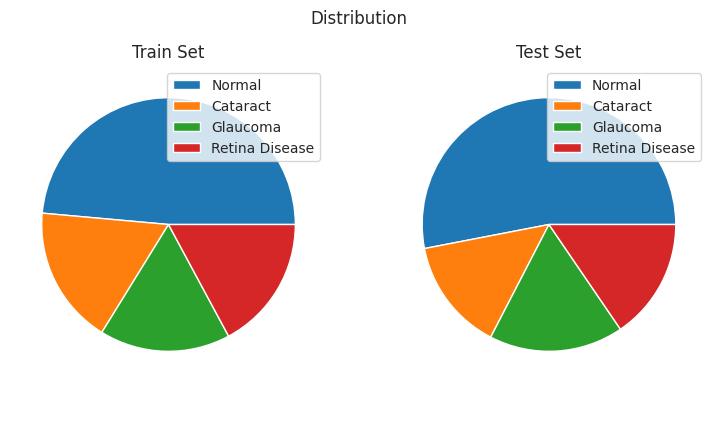

In [13]:
plot_pie_sets([y_train, y_test])

## Modeling<a class="anchor" id="modeling"></a>

For this project, we used a model which based on CNN(Convolutional Neural network).
Convolutional neural networks (CNNs) are particularly well suited for image classification tasks because they are able to learn hierarchical representations of the data. In image classification, the input is typically an image, which can be thought of as a set of pixel values arranged in a grid. CNNs are able to automatically learn the features present in the images, such as edges, corners, and textures, by applying filters to the input image and creating a transformed output image. These filters are learned during training and are able to extract relevant features from the input data.

One of the key advantages of CNNs is that they are able to learn these features directly from the data, without the need for manual feature engineering. This makes them particularly useful for tasks where it is difficult to manually design features that are able to capture the underlying patterns in the data.

In addition to being able to learn features directly from the data, CNNs are also able to process images of different sizes and aspect ratios, since the filters are applied over the entire input image. This makes them well suited for tasks where the size and shape of the input images may vary.

Overall, CNNs are a powerful tool for image classification tasks and have been successfully applied to a wide range of applications, including object recognition, facial recognition, and medical image analysis.

In [14]:
def create_model(channel_size=3, lr=0.001):
    input_shape = []
    if channel_size == 3:  #RGB or HSV channels
        input_shape = [IMAGE_WIDTH, IMAGE_HEIGHT, channel_size]
    elif channel_size == 1:  #Grayscaled images
        input_shape = [IMAGE_WIDTH, IMAGE_HEIGHT,1]
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=input_shape, strides=(1, 1)),
        Conv2D(32, (3, 3), activation='relu', padding="same", strides=(1, 1)),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(64, (3, 3), padding="same", activation='relu', strides=(1, 1)),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

    return model

In [15]:
#Display the model layers
model_display = create_model()
model_display.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

2022-12-27 02:03:51.121095: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 02:03:51.121407: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semooww/PycharmProjects/DSCP/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-27 02:03:51.121490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semooww/PycharmProjects/DSCP/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-27 02:03:51.121558: W tensorflow/compiler/xla/stream_executor/platfor

In [16]:
def strafied_kfold(model, X_train, y_train):
    # Define a StratifiedKFold object
    skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=SEED)
    acc = []
    val_acc = []
    test_acc = []
    loss = []
    val_loss = []
    test_loss = []
    # Iterate over the K folds
    for train_index, test_index in skf.split(X_train, y_train):
        # Split the data into K folds
        X_fold_train, X_fold_val = X_train[train_index], X_train[test_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]

        # Train and evaluate the model on the fold
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
        history = model.fit(X_fold_train, y_fold_train, validation_data=(X_fold_val, y_fold_val), epochs=8,
                            batch_size=BATCH_SIZE, callbacks=[callback])
        score = model.evaluate(X_test, y_test, verbose=2)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        acc = np.concatenate((acc, history.history['accuracy']), axis=None)
        val_acc = np.concatenate((val_acc, history.history['val_accuracy']), axis=None)
        loss = np.concatenate((loss, history.history['loss']), axis=None)
        val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=None)
        test_acc.append(score[1])
        test_loss.append(score[0])
    return model, acc, val_acc, loss, val_loss, test_acc, test_loss

## Evaluation<a class="anchor" id="evaluation"></a>

In [17]:
def plot_history(arrays, title):
    fig = plt.figure(figsize=(15, 6))
    plt.title(f"Evaluation for {title} Images")
    plt.axis('off')
    plt.grid(False)

    fig.add_subplot(1, 2, 1)
    plt.plot(arrays[0])
    plt.plot(arrays[1])

    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["Train", "Validation"], loc=0)

    fig.add_subplot(1, 2, 2)
    plt.plot(arrays[2])
    plt.plot(arrays[3])

    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["Train", "Validation"], loc=0)

In [18]:
model = create_model()
model, acc, val_acc, loss, val_loss, test_acc, test_loss = strafied_kfold(model, X_train, y_train)

Epoch 1/8
105/105 [==============================] - 18s 162ms/step - loss: 1.7390 - accuracy: 0.4268 - val_loss: 1.3477 - val_accuracy: 0.4714
Epoch 2/8
105/105 [==============================] - 17s 163ms/step - loss: 1.2543 - accuracy: 0.4860 - val_loss: 1.2245 - val_accuracy: 0.4881
Epoch 3/8
105/105 [==============================] - 17s 166ms/step - loss: 1.1753 - accuracy: 0.5211 - val_loss: 1.1449 - val_accuracy: 0.5571
Epoch 4/8
105/105 [==============================] - 17s 166ms/step - loss: 1.1622 - accuracy: 0.5259 - val_loss: 1.4140 - val_accuracy: 0.4857
Epoch 5/8
105/105 [==============================] - 17s 167ms/step - loss: 1.1272 - accuracy: 0.5449 - val_loss: 1.0967 - val_accuracy: 0.5619
Epoch 6/8
105/105 [==============================] - 17s 166ms/step - loss: 1.1294 - accuracy: 0.5503 - val_loss: 1.5888 - val_accuracy: 0.3452
Epoch 7/8
105/105 [==============================] - 17s 167ms/step - loss: 1.1528 - accuracy: 0.5545 - val_loss: 1.2606 - val_accuracy:

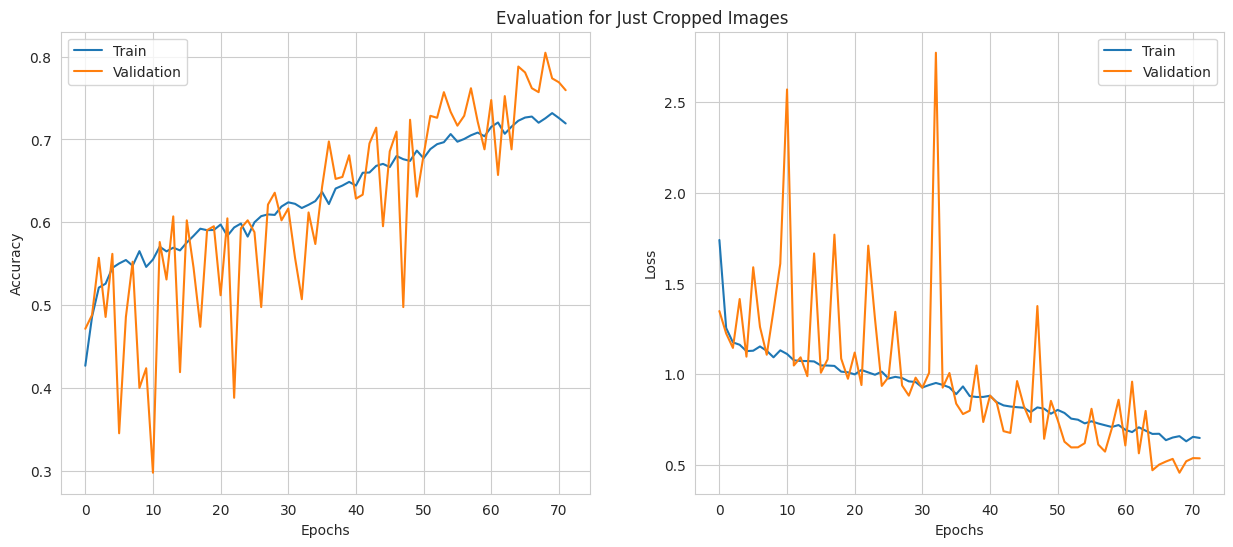

In [19]:
plot_history([acc, val_acc, loss, val_loss], "Just Cropped")

In [20]:
X_train, X_test, y_train, y_test = create_dataset(df, 1)

3780 train images in images dict and 1629 test images in images dict
3780 train labels in labels dict and 1629 test labels in labels dict


In [21]:
model = create_model()
model, acc, val_acc, loss, val_loss, test_acc_normalized, test_loss_normalized = strafied_kfold(model, X_train, y_train)

Epoch 1/8
105/105 [==============================] - 18s 163ms/step - loss: 1.5186 - accuracy: 0.5036 - val_loss: 1.2636 - val_accuracy: 0.4857
Epoch 2/8
105/105 [==============================] - 17s 166ms/step - loss: 1.1013 - accuracy: 0.5381 - val_loss: 1.0251 - val_accuracy: 0.5619
Epoch 3/8
105/105 [==============================] - 17s 166ms/step - loss: 1.0781 - accuracy: 0.5494 - val_loss: 1.1080 - val_accuracy: 0.5167
Epoch 4/8
105/105 [==============================] - 17s 166ms/step - loss: 1.1058 - accuracy: 0.5551 - val_loss: 1.1515 - val_accuracy: 0.4667
Epoch 5/8
105/105 [==============================] - 17s 166ms/step - loss: 1.0967 - accuracy: 0.5461 - val_loss: 1.1550 - val_accuracy: 0.5286
Epoch 6/8
105/105 [==============================] - 17s 166ms/step - loss: 1.0616 - accuracy: 0.5592 - val_loss: 1.0823 - val_accuracy: 0.5476
Epoch 7/8
105/105 [==============================] - 17s 165ms/step - loss: 1.0611 - accuracy: 0.5625 - val_loss: 1.1225 - val_accuracy:

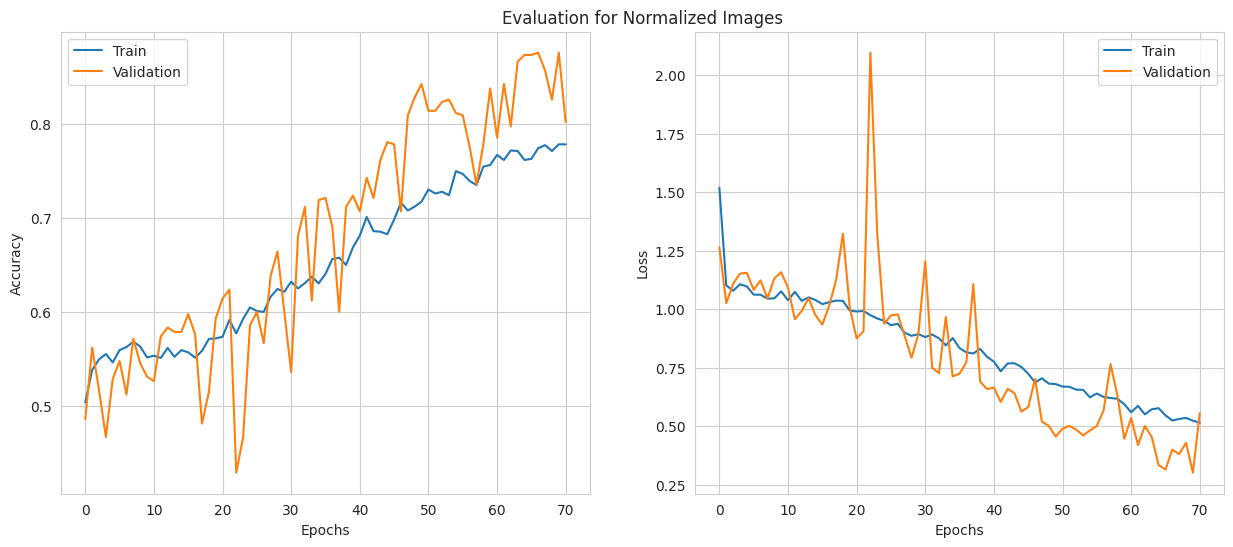

In [22]:
plot_history([acc, val_acc, loss, val_loss], "Normalized")

In [23]:
X_train, X_test, y_train, y_test = create_dataset(df, 2)

3780 train images in images dict and 1629 test images in images dict
3780 train labels in labels dict and 1629 test labels in labels dict


In [24]:
model = create_model(channel_size=1)
model, acc, val_acc, loss, val_loss, test_acc_canny_edge, test_loss_canny_edge = strafied_kfold(model, X_train, y_train)

Epoch 1/8
105/105 [==============================] - 18s 160ms/step - loss: 1.7624 - accuracy: 0.4455 - val_loss: 1.2810 - val_accuracy: 0.4952
Epoch 2/8
105/105 [==============================] - 17s 162ms/step - loss: 1.2023 - accuracy: 0.5128 - val_loss: 1.1891 - val_accuracy: 0.5048
Epoch 3/8
105/105 [==============================] - 17s 163ms/step - loss: 1.1924 - accuracy: 0.4964 - val_loss: 1.1709 - val_accuracy: 0.4905
Epoch 4/8
105/105 [==============================] - 17s 164ms/step - loss: 1.2002 - accuracy: 0.5051 - val_loss: 1.2202 - val_accuracy: 0.5071
Epoch 5/8
105/105 [==============================] - 17s 163ms/step - loss: 1.2187 - accuracy: 0.4949 - val_loss: 1.1946 - val_accuracy: 0.4857
Epoch 6/8
105/105 [==============================] - 17s 163ms/step - loss: 1.2216 - accuracy: 0.4804 - val_loss: 1.1926 - val_accuracy: 0.4857
Epoch 7/8
105/105 [==============================] - 17s 163ms/step - loss: 1.1979 - accuracy: 0.4842 - val_loss: 1.1432 - val_accuracy:

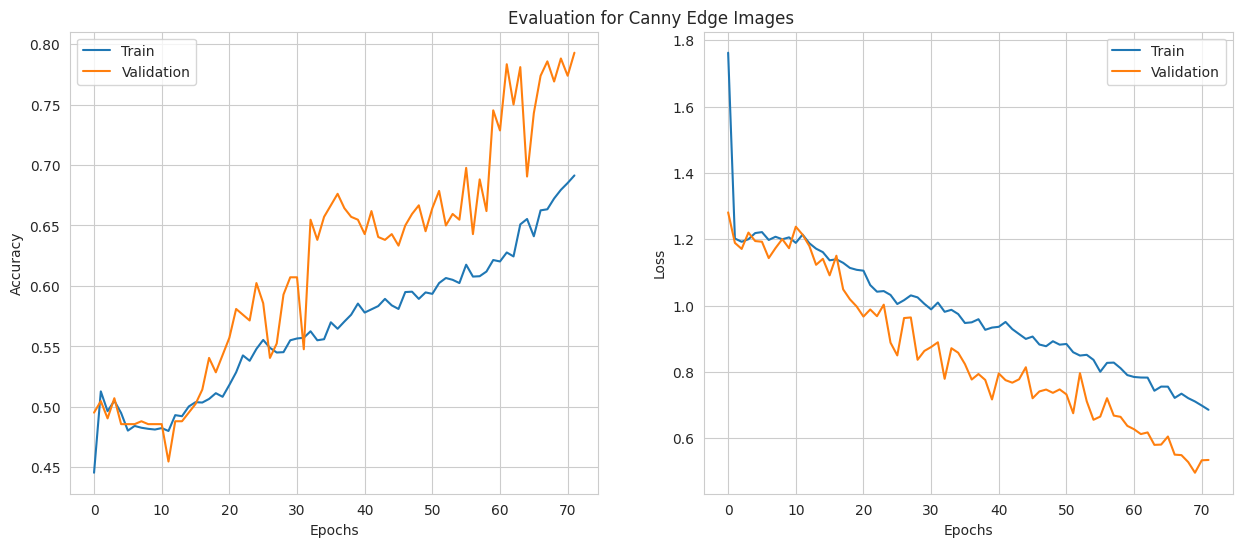

In [25]:
plot_history([acc, val_acc, loss, val_loss], "Canny Edge")

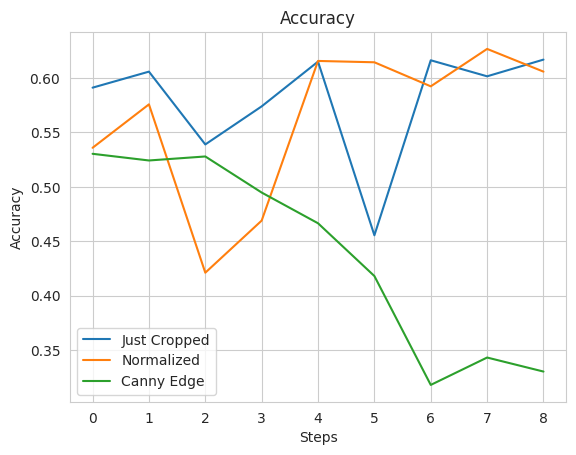

In [26]:
plt.plot(test_acc)
plt.plot(test_acc_normalized)
plt.plot(test_acc_canny_edge)
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Steps")
plt.legend(["Just Cropped", "Normalized","Canny Edge"], loc=0)

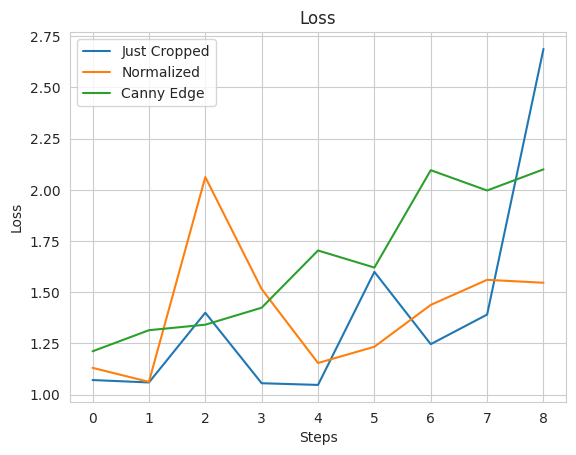

In [27]:
plt.plot(test_loss)
plt.plot(test_loss_normalized)
plt.plot(test_loss_canny_edge)
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Steps")
plt.legend(["Just Cropped", "Normalized","Canny Edge"], loc=0)

# REFERENCES


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>